# Monte Carlo Integration

## Basic Theory

As we have seen that many integrals do not have analytic solutions and thier values are difficult to calculate with even deterministic methods. In monte carlo integration, we treat the **integral as an expectation**, and this leads to surprisingly efficient and potent ways of integral calculation.

Target = Calculating $ \int_{a}^{b} g(x) dx $

From statistics theory we know that if X is a RV with pdf $f(x)$, then the expectation of Random Variable $Y = g(X)$ will be:

$$
 \mathbb{E}_{f} [g(X)] = \int_{A} g(x) f(x) dx 
$$

where A is the domain of the random variable

An unbiased estimate of $ \mathbb{E}[g(X)] $ can be caluculated by the statistic Sample Mean

$$
\theta = \mathbb{E}[g{X}] = \int_{A} g(x) f(x) dx , \; \; \; \bar{\theta} = \bar{g_m(x)} = \frac{1}{m} \sum_{i=1}^{m} g(x)
$$

Where $\theta$ is the target value, and $\bar{\theta}$ is a statistic for it.

And from law of large numbers we know that the $\bar{\theta}$ converges to $\theta$, with a probability of one as $m \to \infty $

In our case, as the target is g(x), we will use a unifrom mean, and scale it suitably

## Basic Examples

1. Estimating $ \int_{0}^{1} e^{-x} dx $

1. Estimating $ \int_{2}^{4} e^{-x} dx $

We will use $ f(x) = U(0,1) $, and $ g(x) = e^{-x} $

We will use $ f(x) = U(2,4) $, and integral $ = 2*g(x) $, 2 for scaling up for $f(x) = 1/2 $ 

In [43]:
import numpy as np
from numpy import random
random.seed(42)

m = [5,10,100,1000,10000,100000]

def h(x):
    return 2*np.exp(-x)

print("The exact value of the integral is: %.4f" % (np.exp(-2) - np.exp(-4)))

for i in m:
    x = random.uniform(2, 4, i)
    y = h(x); mean = np.mean(y) ; var = np.var(y)/i
    print("The MCI estimate for m = %d is: %.4f" % (i, mean), "with std: %.6f" % np.sqrt(var))


The exact value of the integral is: 0.1170
The MCI estimate for m = 5 is: 0.1022 with std: 0.025033
The MCI estimate for m = 10 is: 0.1349 with std: 0.025865
The MCI estimate for m = 100 is: 0.1250 with std: 0.006721
The MCI estimate for m = 1000 is: 0.1181 with std: 0.002106
The MCI estimate for m = 10000 is: 0.1178 with std: 0.000653
The MCI estimate for m = 100000 is: 0.1170 with std: 0.000207


Can do the sin example form tough book mcmc page(84) and compare with numerical methods.

Do the simple example 120, with comparison with numerical method Do example 121 Normal example

## Understanding Variance

While we know that the estimator (sample mean) that we are using is unbiased, but we also have to know its variance to understand how well constrained our answer would be.

$Var( \bar{\theta} ) = \frac{\sigma^2}{m} $, where $\sigma^2 = Var(g(X))$, but we cannot calculate the variance directly so, we will approximate it.

We know that $ S^2 = \frac{1}{m-1} \sum_{i=1}^{m} [g(x_i) - \bar{g(x)} ]^2 $, is an unbiased estimator of $\sigma^2$, so $Var(\bar{\theta})$ can be estimated by:

$$
Var(\bar{\theta}) = \frac{1}{m(m-1)} \sum_{i=1}^{m} [g(x_i) - \bar{g(x)} ]^2
$$

Also, we know from central limit theorem that the sample mean tends to a normal distribution on increasing the number of samples, and this can help us get confidence limits on the value of the integral.

For our case:-

$$
\theta = \int_{a}^{b} g(x) dx = (b-a) \int_{a}^{b} g(x) \frac{1}{b-a} dx, \; \; f = U(a,b)
$$

which leads to the statistic being equal to: $\bar{\theta} = (b-a) \bar{g(x)}$

The $ Var(\bar{g(x)}) = \frac{1}{m} Var(g(x)) \Rightarrow  Var(\bar{\theta}) = \frac{(b-a)^2}{m} Var(g(x)) $

### Rate of descent:
Using a uniform sampling method, the variance falls inversly to m, hense **error $\sim \frac{1}{\sqrt{m}} $**. So if we want to decrease variance from 0.01 to 0.0001, then we will require 10000 more points :scream:.

We will look at some simple techniques for variance reduction.



## Control Variates

An approach to reduce the varaince of Monte carlo estimator of $\theta = \mathbb{E}[g(X)]$, is the use of Control Variates. 

Let us assume, we have a function $f$, such that $\mu = \mathbb{E}[f(X)] $, is known and $f(X)$ is correlated to $g{X}$, then $\hat{\theta_{c}}$ is an unbiased estimator of the $\theta$

$$
\hat{\theta_{c}} = g(X) + c(f(X) - \mu)
$$

The variance is $ Var(\hat{\theta_{c}}) = Var(g(X)) + c^2 Var(f(X)) +2cCov(g(X), f(X))$, a quadratic function in c.
It is minimised at $c = c^{*}$

$$
c^{*} = \frac{-Cov(g(X), f(X))}{Var(f(X))}
$$

and the minimum variance is : $ Var(\hat{\theta_{c}}) = Var(g(X)) - \frac{-Cov(g(X), f(X))}{Var(f(X))} $

The challenge to this approach is that, we have to find the value of c, which depends on the Cov. We can estimate these parameters from a preliminary Monte-Carlo.

### Example1
Calculating $ \theta = \mathbb{E}[e^{x}] = \int_{0}^{1} e^x dx$, using $f(x) = U(0,1)$ as the control variate.

As we know, the value before hand, we can calculate the reduction in variance

$$
Var(g(U)) = Var_{f}(e^x) = \mathbb{E}_{f}[e^{2x}] - (\mathbb{E}_{f}[e^x])^2 = \frac{e^2-1}{2}- (e-1)^2 = 0.2420351
$$

For the control variate $f(x) = U(0,1)$

$\mathbb{E}[U] = 1/2 $, $Var(U) = 1/12$, $Cov(e^U, U) = \int_{0}^{1} (x-1/2)(e^x - (e-1))dx =  1 - (1/2)(e-1) $, as the joint distribution of the two variables is 1, both are sampled from U with transformations.

Hense, $c^{*} = \frac{-Cov(g(X), f(X))}{Var(f(X))} = -12 +6(e-1) = -1.6903$

This gives us $Var(\hat{\theta_{c}}) = Var(g(X)) - \frac{-Cov(g(X), f(X))}{Var(f(X))} = \frac{e^2-1}{2} - (e-1)^2 - 12(1 - \frac{e-1}{2}) = 0.00394$

**Percent reduction in varaince = 100(1 - 0.00394/0.2429) = 98.3781\%**, a significant drop

In [46]:
# Coding up a Control variate example:-
m = [10,1000,100000]
def g(x):
    return np.exp(x)

print("c = ",(-12 + 6*(np.exp(1.0) -1)))

def thetac(x):
    return np.exp(x) + (-12 + 6*(np.exp(1.0) -1))*(x-0.5)

print("The exact value of the integral is: %.4f" % (np.exp(1) - np.exp(0)))

for i in m:
    x = random.uniform(0, 1, i)
    y1 = g(x); mcimean = np.mean(y1) ; mcivar = np.var(y1)/i
    y2 = thetac(x); cvmean = np.mean(y2) ; cvvar = np.var(y2)/i
    print("The MCI estimate for m = %d is: %.4f" % (i, mcimean), "with std: %.4f" % np.sqrt(mcivar))
    print("The Control V estimate for m = %d is: %.4f" % (i, cvmean), "with std: %.4f" % np.sqrt(cvvar))
    print("% reduction in variance = ", 100*(np.var(y1) - np.var(y2))/np.var(y1) )


c =  -1.6903090292457286
The exact value of the integral is: 1.7183
The MCI estimate for m = 10 is: 1.8264 with std: 0.1743
The Control V estimate for m = 10 is: 1.7333 with std: 0.0188
% reduction in variance =  98.83290452145859
The MCI estimate for m = 1000 is: 1.7393 with std: 0.0157
The Control V estimate for m = 1000 is: 1.7193 with std: 0.0020
% reduction in variance =  98.35200148266892
The MCI estimate for m = 100000 is: 1.7199 with std: 0.0016
The Control V estimate for m = 100000 is: 1.7184 with std: 0.0002
% reduction in variance =  98.36936577171319


We can see in the example that even 10 values are giving integral = 1.7230 compared to 1.7570 by the normal MC integration.

### Example2
Calculating $ \theta = \int_{0}^{1} \frac{e^{-x}}{1+x^2} dx$, using $f(x) = \frac{e^{-0.5}}{1+x^2}$ as the control variate.

The choise for the central variate was made by keeping in mind the fact that we want the two functions to be as corelated as possible.

As the range is still (0,1), we will use U(0,1) again, in which the expectation of $f(x)$

$ \mathbb{E}[f(U)] = e^(-0.5) \int_{0}^{1} \frac{1}{1+u^2} du = e^{-0.5} arctan(1) = e^{-0.5} \pi/4 $

Using our preliminary simulation, we estimate the correlation to be $\approx  $


In [3]:
# Calculating the value of Covariate Constant:-
random.seed(420)

m = [10,1000,100000]
def g(x):
    return np.exp(-x)/(1+x**2)

def f(x):
    return np.exp(-0.5)/(1+x**2)

def thetac(x):
    return np.exp(x) + (-12 + 6*(np.exp(1.0) -1))*(x-0.5)

x = random.uniform(0, 1, 100)
y1 = g(x)
y2 = f(x)
print("The covariance is: %.4f" % np.mean((y1 - np.mean(y1))*(y2 - np.mean(y2))) )
print("The variance of g(x) is: %.4f" % np.var(y1))
print("The variance of f(x) is: %.4f" % np.var(y2))
print("The correlation of g(x) and f(x) is: %.4f" % (np.mean((y1 - np.mean(y1))*(y2 - np.mean(y2)))/np.sqrt(np.var(y1)*np.var(y2))) )
c = -(np.mean((y1 - np.mean(y1))*(y2 - np.mean(y2)))/np.var(y2))
print("The value of c: %.4f" % c)


The covariance is: 0.0234
The variance of g(x) is: 0.0615
The variance of f(x) is: 0.0094
The correlation of g(x) and f(x) is: 0.9757
The value of c: -2.5019


In [4]:
random.seed(420)
def thetac(x):
    return np.exp(-x)/(1+x**2) + c*(np.exp(-0.5)/(1+x**2) - np.exp(-0.5)*np.pi/4)

m = [10,1000,100000]

for i in m:
    x = random.uniform(0, 1, i)
    y1 = g(x)
    y2 = thetac(x)
    z = np.linspace(0,1,i)
    print("The deterministic integral for m = %d is: %.4f" % (i, np.mean(g(z))) )
    print("The MCI estimate for m = %d is: %.4f" % (i, np.mean(y1)), "with variance: %.4f" % np.var(y1))
    print("The Control V estimate for m = %d is: %.4f" % (i, np.mean(y2)), "with variance: %.4f" % np.var(y2))
    print("% reduction in variance = ", 100*(np.var(y1) - np.var(y2))/np.var(y1) )

The deterministic integral for m = 10 is: 0.5321
The MCI estimate for m = 10 is: 0.5757 with variance: 0.0471
The Control V estimate for m = 10 is: 0.5100 with variance: 0.0026
% reduction in variance =  94.45179873752338
The deterministic integral for m = 1000 is: 0.5249
The MCI estimate for m = 1000 is: 0.5276 with variance: 0.0597
The Control V estimate for m = 1000 is: 0.5242 with variance: 0.0031
% reduction in variance =  94.72639353010858
The deterministic integral for m = 100000 is: 0.5248
The MCI estimate for m = 100000 is: 0.5252 with variance: 0.0600
The Control V estimate for m = 100000 is: 0.5247 with variance: 0.0032
% reduction in variance =  94.7473229563462


Here we can see how imporved the performance is with control variates, yet the method still cannot beat the numerical method, infact in small dimensions deterministic methods by far overtake the stochastic ones.

## Importance Sampling

Up till now, we have been treating integrals as evidences with respect to a uniform distribution, but we can also take some other suitable function, if it is in the integrand.

The basic method of importance sampling is to use pdf functions (from which we can sample)  which are similar to the integrand and use it to construct the evidence.

This helps us in overcome two shortcomings of simple Monte Carlo Method:
* The method is inefficient if the function $g(x)$ is not very uniform.
* It does not apply to unbounded intervals

If X is the Random Variable with density function $f(x) $, and Y be the random function $Y = \frac{g(X)}{f(X)} $

$$
\int_{} g(x) dx = \int_{} \frac{g(x)}{f(x)} f(x) dx = \mathbb{E}[Y] = \mathbb{E}_{f(x)} [\frac{g(x)}{f(x)}]
$$

and we can get the expectation using;

$$
\frac{1}{m} \sum_{i=1}^{m} Y_i = \frac{1}{m} \sum_{i=1}^{m} \frac{g(X_i)}{f(X_i)}
$$

where the random variables $X_1, ... ,X_m $ are generated from the distribution with density $f(x)$. The density function $f(x)$ is called the importance function.

In the importance sampling method, the variance of the estimator based on $Y = g(X)/f(X)$ is $Var(Y)/m$, so the variance of Y should be small, and variance would be smaller if Y is nearly constant.

Hense, the pdf $f(x)$ should be close to $g(x)$ for low variance.


## Importance Sampling Example

We will use several different importance functions to calculate 

$$
\int_{0}^{1} \frac{e^{-x}}{1 + x^2} dx
$$

Candidates for the importance sampling are:

\begin{align}
& f_0(x) = 1 & 0 < x < 1 \\
& f_1(x) = e^{-x} & 0 < x < \infty \\ 
& f_2(x) = (1+x^2)^{-1}/\pi & -\infty < x < \infty \\
& f_3(x) = e^{-x}/(1 - e^{-1}) & 0 < x < 1 \\
& f_4(x) = 4(1 + x^2)^{-1}/\pi & 0 < x < 1 \\  
\end{align}

In [59]:
# Making importance sampling estimates for the integral:-

random.seed(420)
m = [10,1000,100000]

def importance_sampling1(g, f_sample, f, m):
    samples = np.zeros(m)
    for i in range(m):
        x = f_sample()
        if (x>0) & (x<1):
            samples[i] = g(x)/f(x)
        else:
            i = i-1
    return samples


def g(x): return np.exp(-x)/(1+x**2)

def f0(): return np.random.uniform(0,1)

def f1(): return -np.log(1-random.uniform(0,1))

def f2(): return random.standard_cauchy()

def f3(): return -np.log(1-random.uniform(0,1)*(1-np.exp(-1)))

def f4(): return np.tan(np.pi*(random.uniform(0,1))/4 )

def dash():
    print("--------------------------------------------------")

# Actual integral using mesh method
x = np.linspace(0,1,100001)
print("True value of the integral : ", np.mean(g(x)))

dash()
print("Using f0 as the importance function")
for i in m:
    samples0= importance_sampling1(g, f0, f = lambda x: 1 , m = i)
    mean = np.mean(samples0) ; var = np.var(samples0)/i
    print("The IS estimate for m = %d is: %.4f" % (i, mean) , "with std: %.5f" % np.sqrt(var))

dash()
print("Using f1 as the importance function")
for i in m:
    samples1= importance_sampling1(g, f1, f = lambda x: np.exp(-x) , m = i)
    mean = np.mean(samples1) ; var = np.var(samples1)/i
    print("The IS estimate for m = %d is: %.4f" % (i, mean) , "with std: %.5f" % np.sqrt(var))

dash()
print("Using f2 as the importance function")
for i in m:
    samples2= importance_sampling1(g, f2, f = lambda x: 1/(np.pi*(1+x**2)) , m = i)
    mean = np.mean(samples2) ; var = np.var(samples2)/i
    print("The IS estimate for m = %d is: %.4f" % (i, mean) , "with std: %.5f" % np.sqrt(var))

dash()
print("Using f3 as the importance function")
for i in m:
    samples3 = importance_sampling1(g, f3, f = lambda x: np.exp(-x)/(1- np.exp(-1)) , m = i)
    mean = np.mean(samples3) ; var = np.var(samples3)/i
    print("The IS estimate for m = %d is: %.4f" % (i, mean) , "with std: %.5f" % np.sqrt(var))

dash()
print("Using f4 as the importance function")
for i in m:
    samples4 = importance_sampling1(g, f4, f = lambda x: 4/(np.pi*(1+x**2)) , m = i)
    mean = np.mean(samples4) ; var = np.var(samples4)/i
    print("The IS estimate for m = %d is: %.4f" % (i, mean) , "with std: %.5f" % np.sqrt(var))



True value of the integral :  0.5247978149859911
--------------------------------------------------
Using f0 as the importance function
The IS estimate for m = 10 is: 0.5757 with std: 0.06863
The IS estimate for m = 1000 is: 0.5276 with std: 0.00773
The IS estimate for m = 100000 is: 0.5252 with std: 0.00077
--------------------------------------------------
Using f1 as the importance function
The IS estimate for m = 10 is: 0.2826 with std: 0.13657
The IS estimate for m = 1000 is: 0.5331 with std: 0.01319
The IS estimate for m = 100000 is: 0.5252 with std: 0.00132
--------------------------------------------------
Using f2 as the importance function
The IS estimate for m = 10 is: 0.8624 with std: 0.35985
The IS estimate for m = 1000 is: 0.5048 with std: 0.02973
The IS estimate for m = 100000 is: 0.5273 with std: 0.00302
--------------------------------------------------
Using f3 as the importance function
The IS estimate for m = 10 is: 0.5100 with std: 0.03354
The IS estimate for m = 1

As, we can see the best performance is by the function f3, which resembles the requirement closely. Note here, a problem with f1, and f2 is that their ranges spill out of the required integral, thus a lot of samples are wasted.

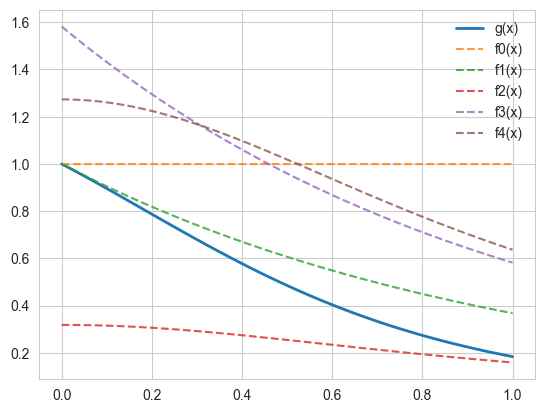

In [73]:
# Pltotting the functions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, ax = plt.subplots(1, 1)
x = np.linspace(0,1,100)

ax.plot(x, g(x), "-" , lw = 2,  alpha=1, label='g(x)')
ax.plot(x, np.ones(len(x)), "--", alpha=0.8, label='f0(x)')
ax.plot(x, np.exp(-x), "--", alpha=0.8, label='f1(x)')
ax.plot(x, 1/(np.pi*(1+x**2)), "--", alpha=0.8, label='f2(x)')
ax.plot(x, np.exp(-x)/(1- np.exp(-1)), "--", alpha=0.8, label='f3(x)')
ax.plot(x, 4/(np.pi*(1+x**2)), "--", alpha=0.8, label='f4(x)')

ax.legend(loc='best', frameon=False)

plt.show()